# Trabalho do curso ProbStat Probability and Statistics (Stanford University)
https://lagunita.stanford.edu/courses/course-v1:OLI+ProbStat+Open_Jan2017/courseware/intro/big_picture/

exercitando os conhecimentos adquiridos com a trilha **Data Scientist with Python** 
(https://www.datacamp.com/tracks/data-scientist-with-python) 

Marco Antunes (antunes73@hotmail.com) / linkedin.com/in/antunes73

## StatTutor Lab: Treating Depression: A Randomized Clinical Trial

#### Problem:
**Background**: Clinical depression is a recurrent illness requiring treatment and often hospitalization. Nearly 50% of people who have an episode of major depression will have a recurrence within 2-3 years. Being able to prevent the recurrence of depression in people who are at risk for the disease would go a long way to alleviate the pain and suffering of patients and would also save society many thousands of dollars in medical expenses and lost wages due to an inability to work.

**The Study**: During the 1980's the federal government, through the National Institutes of Health (NIH), sponsored a multi-centered, randomized, controlled, clinical trial to evaluate two drugs to prevent the recurrence of depression in patients who have had at least one previous episode of the illness (Prien et al., Archives of General Psychiatry, 1984). 

**The Study Design**: The study was multi-centered. There were 5 medical clinics in major metropolitan areas across the country that participated in this trial. Using many clinics enabled the investigators to enroll many more patients into the study and allowed for more diversity in the patients who participated. There were 3 treatment groups. Patients received either Imipramine (Imip), Lithium (Li), or a Placebo (Pl) where Imip and Li are active drugs. Patients were randomly assigned to one of the 3 treatment groups. Like most other medical studies where new, unexplored treatments are evaluated, patients chose themselves to participate in the study by signing a consent form. Patients were followed for 2-4 years to see whether or not they had a recurrence of depression. If they did not have a recurrence within this time frame, then their treatment was considered a Success. If they did have a recurrence, it was considered a Failure. The study was double-blinded. A number of additional background variables were measured for each patient.

#### Questions to answer:
Q1. Which of the drugs (if either) was more successful in preventing the recurrence of depression relative to the placebo?

Q2. Which of the drugs (if either) delayed the recurrence of depression longer relative to the placebo?


Antes de responder essas questões, vamos proceder com uma análise exploratória dos dados disponibilizados.

        ### Passo 1 - Carregar os dados: depression2.xls
      
#### Variables: 
Hospt: Which hospital the patient was from: Labeled 1, 2, 3, 5 or 6
Treat: 0=Lithium; 1=Imipramine; 2=Placebo
Outcome: 0=Success 1=Failure (recurrence of depression)
Time: Number of weeks until a recurrence (if outcome=1) or until study ended (if outcome=0)
AcuteT: How long the patient was depressed before the start of the current study, measured in days
Age: Age in years
Gender: 1=Female 2=Male

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
de = pd.read_excel(r"c:\temp\depression2.xls")

      ### Passo 2 - Visually inspect

In [2]:
de.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 7 columns):
Hospt      109 non-null int64
Treat      109 non-null int64
Outcome    109 non-null int64
Time       109 non-null float64
AcuteT     109 non-null int64
Age        109 non-null int64
Gender     109 non-null int64
dtypes: float64(1), int64(6)
memory usage: 6.0 KB


Ok, sem problemas com nomes inconsistentes de colunas - pelo menos, aparentemente;
Também não temos problemas com dados faltantes. Todas as colunas do dataset tem 109 registros... 

só por vias das dúvidas, vamos dar um 'assert' e nos garantir contra a presença de 'NaN's:

In [3]:
assert de.notnull().all().all()

como o Python não "cuspiu" nenhum 'AssertionError' então significa que todo o nosso dataset está livre dessa praga.

Agora vamos dar uma "olhada" nos dados:

In [4]:
de.head()

,Hospt,Treat,Outcome,Time,AcuteT,Age,Gender
0,1,0,1,36.143002,211,33,1
1,1,1,0,105.142998,176,49,1
2,1,1,0,74.570999,191,50,1
3,1,0,1,49.714001,206,29,2
4,1,0,0,14.429000,63,29,1


    ### Passo 3 - Ajustar os dados
    
Bom, olhando para os dados e revendo a documentação de cada variável informada lá no início do problema decido realizar algumas "adaptações" para melhorar a visualização. 
A coluna Hospt está ok pois se trata de um ID;
A coluna Treat vou transformar seus valores em texto.
Para isso, crio uma função de transformação que receberá o valor inteiro e devolverá o nome do tratamento:

In [5]:
# Define recode_treat()
def recode_treat(treat_value):    

    # Return 'Lithium' if treat_value is 0    
    if treat_value == 0:        
            return 'Lithium'        

    # Return 'Imipramine' if treat_value is 1    
    elif treat_value == 1:        
        return 'Imipramine'            

    # Return 'Placebo' if treat_value is 2    
    elif treat_value == 2:        
        return 'Placebo'            

    # Return np.nan        
    else:        
        return np.nan

Agora basta aplicá-la à coluna Treat:

In [6]:
de['Treat'] = de.Treat.apply(recode_treat)

Vamos conferir o resultado:

In [7]:
de.head()

,Hospt,Treat,Outcome,Time,AcuteT,Age,Gender
0,1,Lithium,1,36.143002,211,33,1
1,1,Imipramine,0,105.142998,176,49,1
2,1,Imipramine,0,74.570999,191,50,1
3,1,Lithium,1,49.714001,206,29,2
4,1,Lithium,0,14.429000,63,29,1


Feito! Coluna Treat agora com o nome do tratamento ao invés de indicadores.
Faremos a mesma coisa agora com a coluna Outcome.
Também criaremos uma função de transformação similar:

In [8]:
# Define recode_outcome()
def recode_outcome(outcome_value):    

    # Return 'Success' if outcome_value is 0    
    if outcome_value == 0:        
            return 'Success'        

    # Return 'Failure' if outcome_value is 1    
    elif outcome_value == 1:        
        return 'Failure'            

    # Return np.nan        
    else:        
        return np.nan

Aplicamos à coluna certa:

In [9]:
de['Outcome'] = de.Outcome.apply(recode_outcome)

conferindo...

In [10]:
de.head()

,Hospt,Treat,Outcome,Time,AcuteT,Age,Gender
0,1,Lithium,Failure,36.143002,211,33,1
1,1,Imipramine,Success,105.142998,176,49,1
2,1,Imipramine,Success,74.570999,191,50,1
3,1,Lithium,Failure,49.714001,206,29,2
4,1,Lithium,Success,14.429000,63,29,1


Ok. Duas já foram. Agora vamos transformar a coluna Gender.
Outra função:

In [11]:
# Define recode_sex()
def recode_sex(sex_value):    

    # Return Female if sex_value is 1    
    if sex_value == 1:        
            return 'Female'        

    # Return Male if sex_value is 2    
    elif sex_value == 2:        
        return 'Male'            

    # Return np.nan        
    else:        
        return np.nan

aplicando...

In [12]:
de['Gender'] = de.Gender.apply(recode_sex)

conferindo...

In [13]:
de.head()

,Hospt,Treat,Outcome,Time,AcuteT,Age,Gender
0,1,Lithium,Failure,36.143002,211,33,Female
1,1,Imipramine,Success,105.142998,176,49,Female
2,1,Imipramine,Success,74.570999,191,50,Female
3,1,Lithium,Failure,49.714001,206,29,Male
4,1,Lithium,Success,14.429000,63,29,Female


Vamos aproveitar o momento e já transformar o **tipo** dessas 3 colunas que alteramos para 'category' (uma prática que 
diminui o tamanho do DataFrame em memória e pode ser utilizado por bibliotecas Python de análise de dados)

In [14]:
de['Treat'] = de['Treat'].astype('category')
de['Outcome'] = de['Outcome'].astype('category')
de['Gender'] = de['Gender'].astype('category')

In [15]:
de.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 7 columns):
Hospt      109 non-null int64
Treat      109 non-null category
Outcome    109 non-null category
Time       109 non-null float64
AcuteT     109 non-null int64
Age        109 non-null int64
Gender     109 non-null category
dtypes: category(3), float64(1), int64(3)
memory usage: 3.9 KB


Ok, as 3 colunas já estão com type = 'category'.

Com mais um comando simples vamos analisar informações estatísticas sobre as colunas numéricas:

In [16]:
de.describe()

,Hospt,Time,AcuteT,Age
count,109.000000,109.000000,109.000000,109.000000
mean,3.926606,46.515082,185.669725,40.256881
std,1.879255,45.141643,88.618623,12.862092
min,1.000000,0.000000,47.000000,20.000000
25%,2.000000,6.286000,133.000000,29.000000
50%,5.000000,31.857000,165.000000,39.000000
75%,5.000000,78.429001,214.000000,51.000000
max,6.000000,206.000000,512.000000,65.000000


Como a coluna 'Hospt' armazena ID´s de hospitais, vamos desconsiderá-la pois nenhum cálculo estatístico aqui faz sentido.
A coluna 'AcuteT' não demonstra nenhum valor suspeito. Assim também como a coluna 'Age' com mínimo de 20 anos e máximo de 65.
Na coluna 'Time' (Number of weeks until a recurrence (if outcome=1) or until study ended (if outcome=0)), podemos verificar que os valores mínimos e máximos fazem sentido e que não existem dados *outliers*. O valor máximo de 206 semanas está dentro do período de até 4 anos do estudo. Mas, ter um valor mínimo = 0 (zero) sempre levanta a suspeita de ser um dado "faltante" e não um indicador medido. 

    ### Passo 4 - Responder às questões levantadas pelo problema
   
Q1. Which of the drugs (if either) was more successful in preventing the recurrence of depression relative to the placebo?

Para responder isso, vamos analisar os resultados (coluna 'Outcome') de cada tratamento em separado.
Inicialmente, o Lithium. Fazemos um recorte apenas dos dados onde o tratamento é = Lithium e depois geramos um gráfico de pizza com base na coluna 'Outcome':

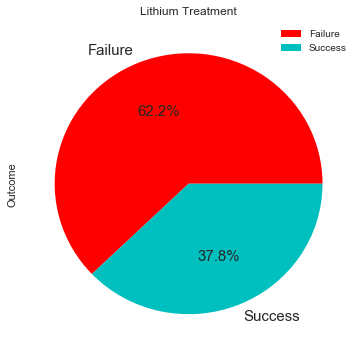

In [17]:
Li = de.loc[de['Treat'] == 'Lithium']
Li['Outcome'].value_counts().plot(kind='pie', title='Lithium Treatment', autopct='%1.1f%%', 
             legend=True, figsize=(6, 6), colors=['r', 'c'], fontsize=15)
plt.show()

Vamos guardar esse resultado:

In [18]:
res = pd.DataFrame([['Lithium', 37.8, 62.2]], columns=['Treatment', '% Success', '% Failure'])
res

,Treatment,% Success,% Failure
0,Lithium,37.8,62.2


Agora com Imipramine:

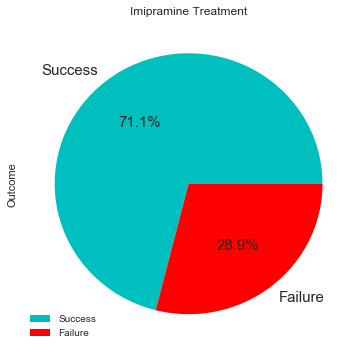

In [19]:
Im = de.loc[de['Treat'] == 'Imipramine']
Im['Outcome'].value_counts().plot(kind='pie', title='Imipramine Treatment', autopct='%1.1f%%', 
             legend=True, figsize=(6, 6), colors=['c', 'r'], fontsize=15)
plt.show()

In [20]:
res2 = pd.DataFrame([['Imipramine', 71.1, 28.9]], columns=['Treatment', '% Success', '% Failure'])
res.append(res2, ignore_index=True)

,Treatment,% Success,% Failure
0,Lithium,37.8,62.2
1,Imipramine,71.1,28.9


E com Placebo:

Pl = de.loc[de['Treat'] == 'Placebo']
Pl['Outcome'].value_counts().plot(kind='pie', title='Placebo Treatment', autopct='%1.1f%%', 
             legend=True, figsize=(6, 6), colors=['r', 'c'], fontsize=15)
plt.show()

res3 = pd.DataFrame([['Placebo', 32.4, 67.6]], columns=['Treatment', '% Success', '% Failure'])
resultado = res.append([res2, res3], ignore_index=True)
resultado

Voltando à primeira pergunta:
Q1. Which of the drugs (if either) was more successful in preventing the recurrence of depression relative to the placebo?
A resposta é: Imipramine

Indo para a segunda pergunta:
Q2. Which of the drugs (if either) delayed the recurrence of depression longer relative to the placebo?


Seguindo as perguntas do StatTutor

In [23]:
de['Treat'].value_counts()

Imipramine    38
Lithium       37
Placebo       34
Name: Treat, dtype: int64

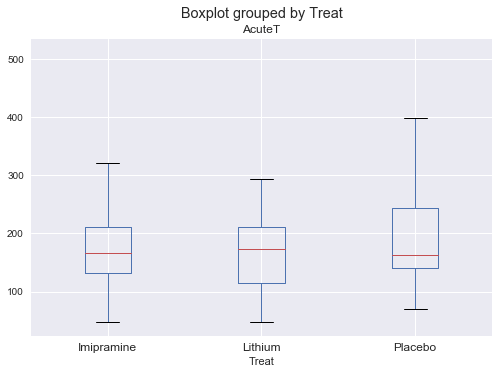

In [24]:
de.boxplot(column='AcuteT', by='Treat')
plt.show()

In [25]:
trat = pd.crosstab(index=de['Outcome'], 
                    columns=de['Treat'], 
                    margins=True)
trat

Treat,Imipramine,Lithium,Placebo,All
Outcome,,,,
Failure,11,23,23,57
Success,27,14,11,52
All,38,37,34,109


In [26]:
trat/trat.ix['All']

Treat,Imipramine,Lithium,Placebo,All
Outcome,,,,
Failure,0.289474,0.621622,0.676471,0.522936
Success,0.710526,0.378378,0.323529,0.477064
All,1.000000,1.000000,1.000000,1.000000


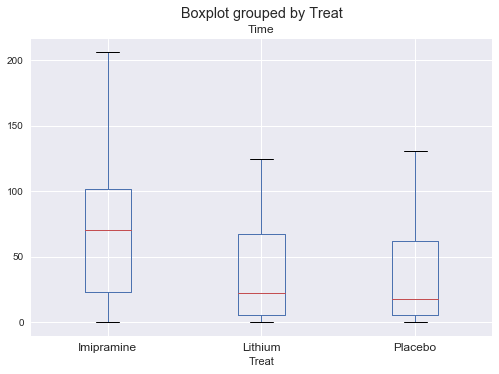

In [27]:
de.boxplot(column='Time', by='Treat')
plt.show()

In [28]:
Li['Time'].describe()

count     37.000000
mean      37.725919
std       40.822979
min        0.286000
25%        5.286000
50%       22.000000
75%       67.000000
max      165.000000
Name: Time, dtype: float64

In [29]:
Im['Time'].describe()

count     38.000000
mean      63.063868
std       49.485291
min        0.571000
25%       23.000000
50%       70.714001
75%      101.500000
max      206.000000
Name: Time, dtype: float64

In [30]:
Pl['Time'].describe()

count     34.000000
mean      37.584059
std       40.265052
min        0.000000
25%        5.392750
50%       17.785999
75%       61.714001
max      131.000000
Name: Time, dtype: float64

In this exercise we assessed the effectiveness of Lithium and Imipramine as treatments for depression. The two measures of effectiveness were whether or not recurrence of depression occurred, and the time until recurrence of depression. Using both measures we found that Imipramine is more effective than Lithium. More specifically, patients who were treated with Imipramine were less likely to have a recurrence of depression, and if they did, it took longer for recurrence to occur compared to patients who were treated with Lithium.

The results we found also called into question the effectiveness of Lithium since the patients who were treated with it did not display any substantial differences compared to patients who did not receive any treatment, both in terms of an occurrence of depression, and in terms of the time until a recurrence.

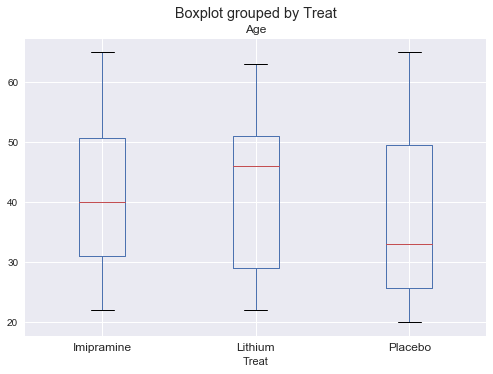

In [31]:
de.boxplot(column='Age', by='Treat')
plt.show()

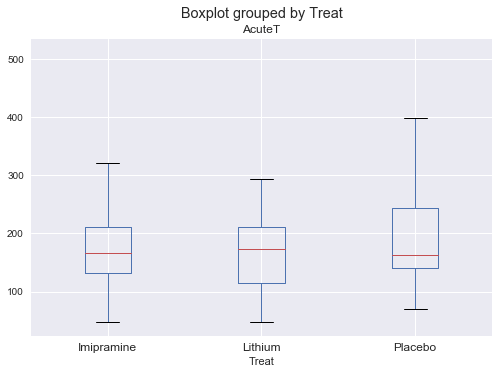

In [32]:
de.boxplot(column='AcuteT', by='Treat')
plt.show()

In [33]:
trat = pd.crosstab(index=de['Gender'], 
                    columns=de['Treat'], 
                    margins=True)
trat/trat.ix['All']

Treat,Imipramine,Lithium,Placebo,All
Gender,,,,
Female,0.657895,0.675676,0.617647,0.651376
Male,0.342105,0.324324,0.382353,0.348624
All,1.000000,1.000000,1.000000,1.000000


In [34]:
trat = pd.crosstab(index=de['Gender'], 
                    columns=de['Treat'], 
                    margins=True)
trat/trat.ix['All']

Treat,Imipramine,Lithium,Placebo,All
Gender,,,,
Female,0.657895,0.675676,0.617647,0.651376
Male,0.342105,0.324324,0.382353,0.348624
All,1.000000,1.000000,1.000000,1.000000


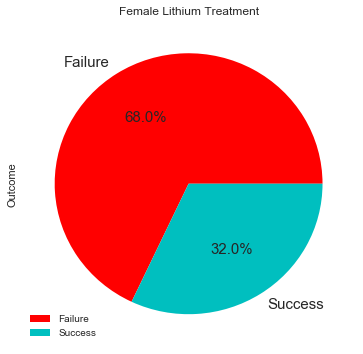

In [35]:
defe = de.loc[de['Gender'] == 'Female']
dema = de.loc[de['Gender'] == 'Male']

Life = defe.loc[defe['Treat'] == 'Lithium']
Life['Outcome'].value_counts().plot(kind='pie', title='Female Lithium Treatment', autopct='%1.1f%%', 
             legend=True, figsize=(6, 6), colors=['r', 'c'], fontsize=15)
plt.show()

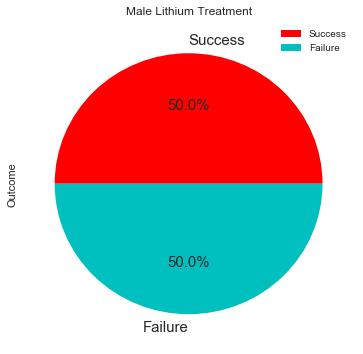

In [36]:
Lima = dema.loc[dema['Treat'] == 'Lithium']
Lima['Outcome'].value_counts().plot(kind='pie', title='Male Lithium Treatment', autopct='%1.1f%%', 
             legend=True, figsize=(6, 6), colors=['r', 'c'], fontsize=15)
plt.show()

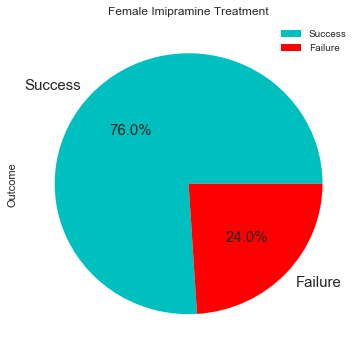

In [37]:
Imfe = defe.loc[defe['Treat'] == 'Imipramine']
Imfe['Outcome'].value_counts().plot(kind='pie', title='Female Imipramine Treatment', autopct='%1.1f%%', 
             legend=True, figsize=(6, 6), colors=['c', 'r'], fontsize=15)
plt.show()

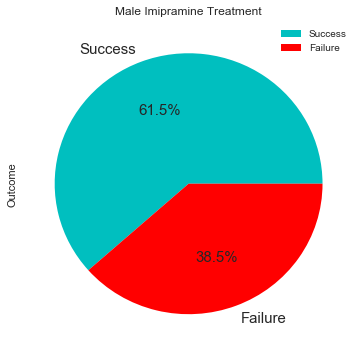

In [38]:
Imma = dema.loc[dema['Treat'] == 'Imipramine']
Imma['Outcome'].value_counts().plot(kind='pie', title='Male Imipramine Treatment', autopct='%1.1f%%', 
             legend=True, figsize=(6, 6), colors=['c', 'r'], fontsize=15)
plt.show()

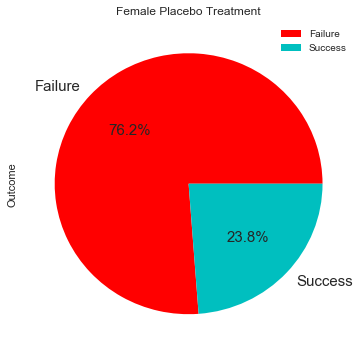

In [39]:
Plfe = defe.loc[defe['Treat'] == 'Placebo']
Plfe['Outcome'].value_counts().plot(kind='pie', title='Female Placebo Treatment', autopct='%1.1f%%', 
             legend=True, figsize=(6, 6), colors=['r', 'c'], fontsize=15)
plt.show()

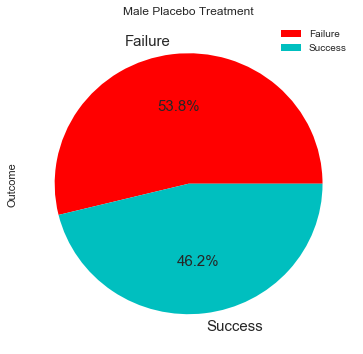

In [40]:
Plma = dema.loc[dema['Treat'] == 'Placebo']
Plma['Outcome'].value_counts().plot(kind='pie', title='Male Placebo Treatment', autopct='%1.1f%%', 
             legend=True, figsize=(6, 6), colors=['r', 'c'], fontsize=15)
plt.show()

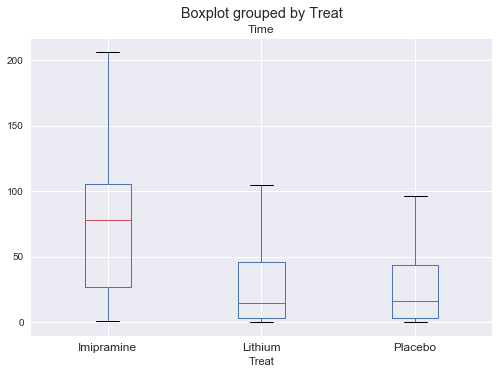

In [41]:
defe.boxplot(column='Time', by='Treat')
plt.show()

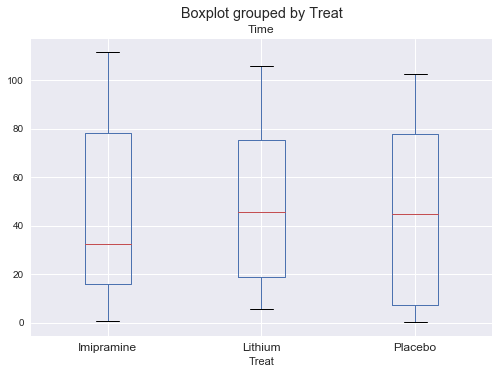

In [42]:
dema.boxplot(column='Time', by='Treat')
plt.show()